## ResNet (DNN) Example for Fashion MNIST Dataset

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


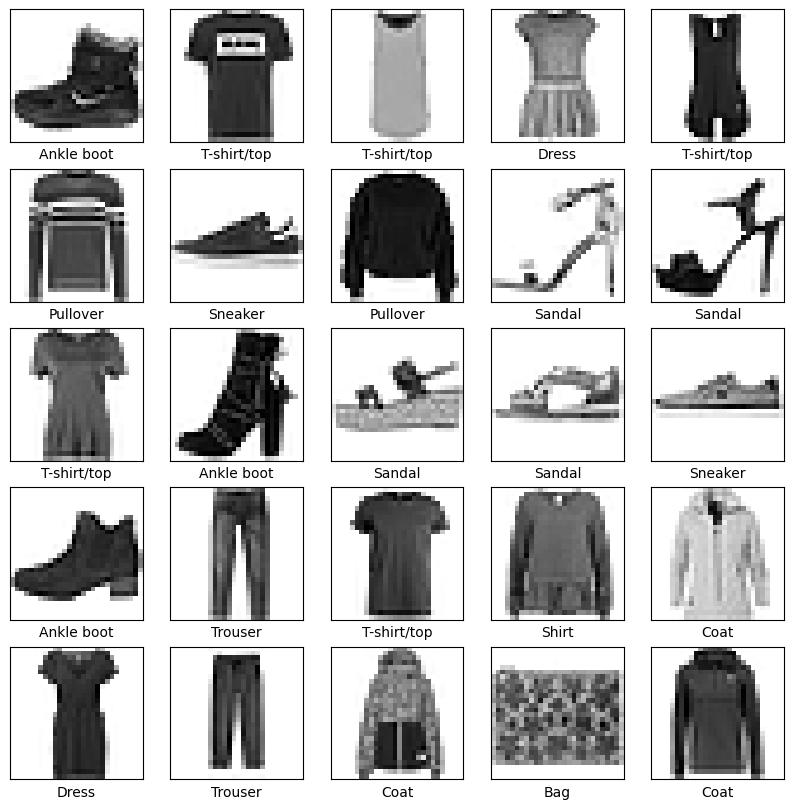

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input, Add, Activation, Flatten
from tensorflow.keras.utils import to_categorical

# Load and preprocess data
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Flatten the images for DNN
x_train_flat = x_train.reshape(-1, 28*28)
x_test_flat = x_test.reshape(-1, 28*28)

# Visualize some samples
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[np.argmax(y_train[i])])
plt.show()

In [2]:

from tensorflow.keras.layers import Dropout, BatchNormalization

def create_dnn():
    inputs = Input(shape=(784,))
    x = Dense(512)(inputs)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dropout(0.3)(x)

    x = Dense(256)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dropout(0.3)(x)

    x = Dense(128)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dropout(0.3)(x)

    outputs = Dense(10, activation='softmax')(x)
    return Model(inputs, outputs)


In [3]:

def create_resnet_dnn():
    inputs = Input(shape=(784,))

    # Initial projection
    x = Dense(1024)(inputs)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dropout(0.5)(x)

    # Residual block 1
    shortcut1 = x
    x = Dense(1024)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dropout(0.5)(x)
    x = Dense(1024)(x)
    x = BatchNormalization()(x)
    x = Add()([shortcut1, x])
    x = Activation('relu')(x)

    # Residual block 2
    shortcut2 = Dense(512)(x)  # Match dimensions
    x = Dense(512)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dropout(0.4)(x)
    x = Dense(512)(x)
    x = BatchNormalization()(x)
    x = Add()([shortcut2, x])
    x = Activation('relu')(x)

    # Residual block 3
    shortcut3 = Dense(256)(x)
    x = Dense(256)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dropout(0.3)(x)
    x = Dense(256)(x)
    x = BatchNormalization()(x)
    x = Add()([shortcut3, x])
    x = Activation('relu')(x)

    # Final classification layer
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.3)(x)
    outputs = Dense(10, activation='softmax')(x)

    return Model(inputs, outputs)


In [4]:
# Create and compile models
dnn_model = create_dnn()
resnet_model = create_resnet_dnn()

dnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
resnet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [5]:

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

early_stop = EarlyStopping(patience=5, restore_best_weights=True)
checkpoint = ModelCheckpoint("best_dnn_model.h5", save_best_only=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)

dnn_history = dnn_model.fit(x_train_flat, y_train,
                            epochs=50,
                            batch_size=128,
                            validation_split=0.2,
                            callbacks=[early_stop, checkpoint, lr_scheduler],
                            verbose=1)


Epoch 1/50
368/375 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7274 - loss: 0.7992

375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.7288 - loss: 0.7948 - val_accuracy: 0.8497 - val_loss: 0.4093 - learning_rate: 0.0010
Epoch 2/50
374/375 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8391 - loss: 0.4369

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8391 - loss: 0.4368 - val_accuracy: 0.8542 - val_loss: 0.3911 - learning_rate: 0.0010
Epoch 3/50
358/375 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8613 - loss: 0.3833

375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8613 - loss: 0.3832 - val_accuracy: 0.8717 - val_loss: 0.3504 - learning_rate: 0.0010
Epoch 4/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8709 - loss: 0.3611 - val_accuracy: 0.8589 - val_loss: 0.3681 - learning_rate: 0.0010
Epoch 5/50
369/375 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8753 - loss: 0.3420

375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8753 - loss: 0.3419 - val_accuracy: 0.8758 - val_loss: 0.3431 - learning_rate: 0.0010
Epoch 6/50
372/375 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8833 - loss: 0.3189

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8833 - loss: 0.3189 - val_accuracy: 0.8781 - val_loss: 0.3277 - learning_rate: 0.0010
Epoch 7/50
374/375 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8862 - loss: 0.3067

375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8862 - loss: 0.3067 - val_accuracy: 0.8853 - val_loss: 0.3175 - learning_rate: 0.0010
Epoch 8/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8930 - loss: 0.2920 - val_accuracy: 0.8825 - val_loss: 0.3251 - learning_rate: 0.0010
Epoch 9/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8946 - loss: 0.2866 - val_accuracy: 0.8804 - val_loss: 0.3268 - learning_rate: 0.0010
Epoch 10/50
361/375 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8954 - loss: 0.2800

375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8954 - loss: 0.2799 - val_accuracy: 0.8857 - val_loss: 0.3133 - learning_rate: 0.0010
Epoch 11/50
360/375 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9062 - loss: 0.2601

375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9061 - loss: 0.2602 - val_accuracy: 0.8935 - val_loss: 0.2967 - learning_rate: 0.0010
Epoch 12/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9027 - loss: 0.2610 - val_accuracy: 0.8776 - val_loss: 0.3327 - learning_rate: 0.0010
Epoch 13/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9095 - loss: 0.2436 - val_accuracy: 0.8862 - val_loss: 0.3103 - learning_rate: 0.0010
Epoch 14/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9116 - loss: 0.2396 - val_accuracy: 0.8887 - val_loss: 0.3137 - learning_rate: 0.0010
Epoch 15/50
363/375 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9205 - loss: 0.2130

375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9205 - loss: 0.2130 - val_accuracy: 0.8997 - val_loss: 0.2845 - learning_rate: 5.0000e-04
Epoch 16/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9264 - loss: 0.2000

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9264 - loss: 0.2000 - val_accuracy: 0.9006 - val_loss: 0.2838 - learning_rate: 5.0000e-04
Epoch 17/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9279 - loss: 0.1965 - val_accuracy: 0.8963 - val_loss: 0.2909 - learning_rate: 5.0000e-04
Epoch 18/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9283 - loss: 0.1903 - val_accuracy: 0.8958 - val_loss: 0.2961 - learning_rate: 5.0000e-04
Epoch 19/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9321 - loss: 0.1808 - val_accuracy: 0.8832 - val_loss: 0.3253 - learning_rate: 5.0000e-04
Epoch 20/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9359 - loss: 0.1762 - val_accuracy: 0.9004 - val_loss: 0.2915 - learning_rate: 2.5000e-04
Epoch 21/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9413 - loss: 0.1609 - val_accuracy: 0.9026 - val_loss: 0.2861 - learning_rate: 2.5000e-04


In [6]:
resnet_model = create_resnet_dnn()
resnet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

resnet_history = resnet_model.fit(x_train_flat, y_train,
                                  epochs=50,
                                  batch_size=128,
                                  validation_split=0.2,
                                  callbacks=[early_stop, checkpoint, lr_scheduler],
                                  verbose=1)


Epoch 1/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.6968 - loss: 0.8740 - val_accuracy: 0.8218 - val_loss: 0.4948 - learning_rate: 0.0010
Epoch 2/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8345 - loss: 0.4701 - val_accuracy: 0.8471 - val_loss: 0.4329 - learning_rate: 0.0010
Epoch 3/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8489 - loss: 0.4158 - val_accuracy: 0.8500 - val_loss: 0.4196 - learning_rate: 0.0010
Epoch 4/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8606 - loss: 0.3915 - val_accuracy: 0.8641 - val_loss: 0.3732 - learning_rate: 0.0010
Epoch 5/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8698 - loss: 0.3587 - val_accuracy: 0.8764 - val_loss: 0.3478 - learning_rate: 0.0010
Epoch 6/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8751 - loss: 0.3492 - val_accuracy: 0.8783 - val_loss: 0.3425 - learning_rate: 0.0010
Epoch 7/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8809 - loss: 0.3274 

In [7]:
# Plot training history
def plot_history(history, title):
    plt.figure(figsize=(12, 4))
    plt.suptitle(title)

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss')
    plt.legend()

    plt.show()

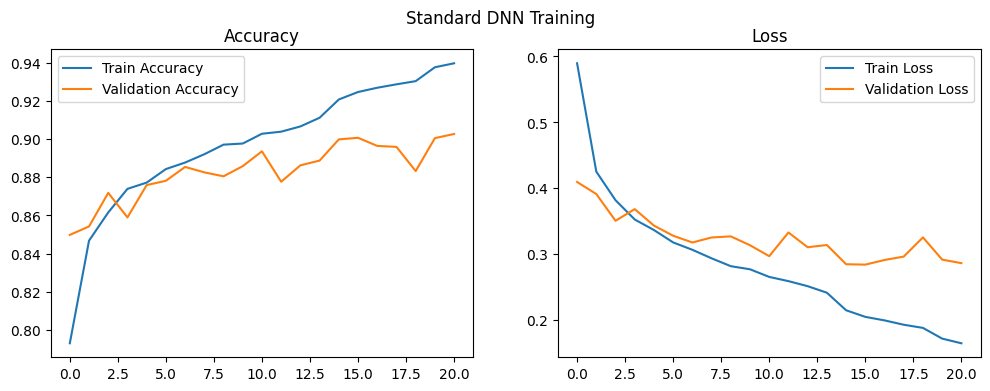

In [12]:
plot_history(dnn_history, 'Standard DNN Training')

In [9]:
# Evaluate on test set
dnn_test_loss, dnn_test_acc = dnn_model.evaluate(x_test_flat, y_test, verbose=0)
resnet_test_loss, resnet_test_acc = resnet_model.evaluate(x_test_flat, y_test, verbose=0)

In [10]:
print(f"Standard DNN Test Accuracy: {dnn_test_acc:.4f}")
print(f"ResNet-style DNN Test Accuracy: {resnet_test_acc:.4f}")

Standard DNN Test Accuracy: 0.8952
ResNet-style DNN Test Accuracy: 0.8924



Standard DNN Predictions:
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


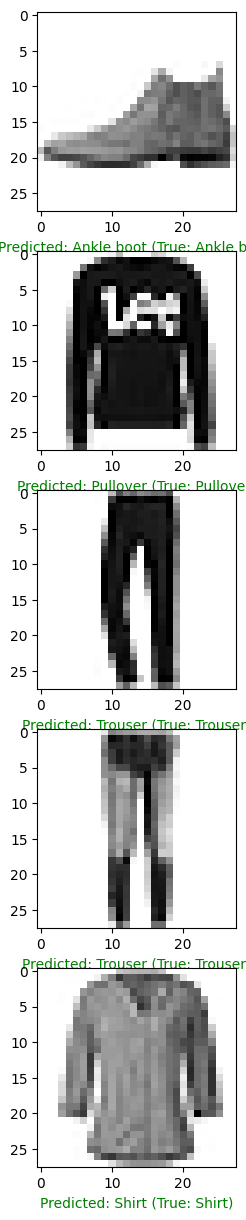


ResNet-style DNN Predictions:
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


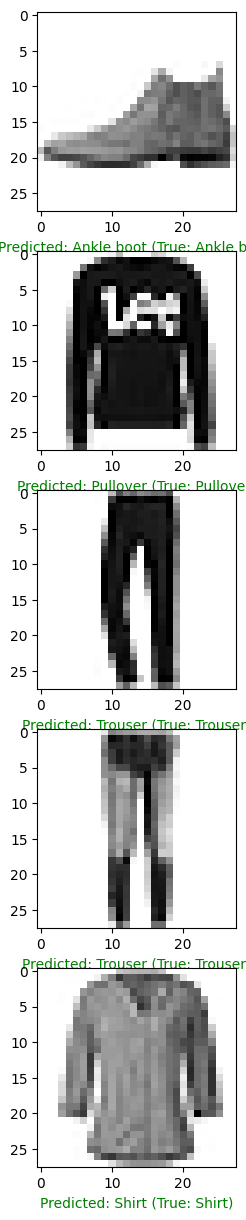

In [11]:
# Make predictions and visualize some results
def plot_predictions(model, x_test, y_test, num_images=5):
    predictions = model.predict(x_test)
    plt.figure(figsize=(15, 3*num_images))
    for i in range(num_images):
        plt.subplot(num_images, 1, i+1)
        plt.imshow(x_test[i].reshape(28, 28), cmap=plt.cm.binary)
        pred_label = np.argmax(predictions[i])
        true_label = np.argmax(y_test[i])
        color = 'green' if pred_label == true_label else 'red'
        plt.xlabel(f"Predicted: {class_names[pred_label]} (True: {class_names[true_label]})", color=color)
    plt.show()

print("\nStandard DNN Predictions:")
plot_predictions(dnn_model, x_test_flat, y_test)

print("\nResNet-style DNN Predictions:")
plot_predictions(resnet_model, x_test_flat, y_test)